
**Table of Contents**
 
1. [RNAseq](#RNAseq)     <br>
    * [1.1 Trim](#RNAseq_trim)<br>
    * [1.2 Gene expression](#RNAseq_exp)<br>
    * [1.3 Fusion](#RNAseq_fusion)<br>
    * [1.4 RNAseQC](#RNAseq_rnaseqc)<br>
2. [DNAseq](#DNAseq) <br>
    * [2.1 Generate bam](#DNAseq_bam)<br>
        * [2.1.1 Trim](#DNAseq_trim)<br>
        * [2.1.2 GATK best practice](#DNAseq_gatk)<br>
    * [2.2 Mutation calling](#DNAseq_snv)<br>
        * [2.2.1 Strelka](#DNAseq_strelka)<br>
        * [2.2.2 Varscan](#DNAseq_varscan)<br>
        * [2.2.3 Mutect](#DNAseq_mutect)<br>
        * [2.2.4 Pindel](#DNAseq_pindel)<br>
    * [2.3 Copy number variations](#DNAseq_cnv)<br>
        * [2.3.1 CNVkit](#DNAseq_cnvkit)<br>
        * [2.3.2 Sequenza](#DNAseq_seqz)<br>
        * [2.3.3 PureCN](#DNAseq_purecn)<br>

## <a class  = "anchor" id="RNAseq"></a>  RNAseq 
---

- input: rna_fq.ls
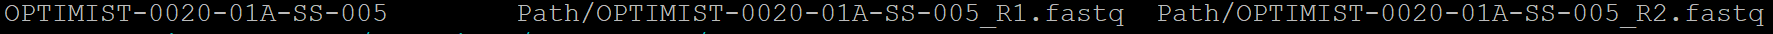
    
- script: generate_sh.pl
- generate shell file:
`perl /home/hef/2.project/2.OPTIMIST/2.RNA/generate_sh.pl rna_fq.ls`


### <a id="RNAseq_trim"></a> Trim

- input: fastq
- output: trimmed fastq

trim_galore:


`trim_galore --phred33 --fastqc --length 50 -q 20 --dont_gzip -o /project/gccri/OPTIMIST/analysis/RNA/1.trim/trimmed_fq --paired /project/gccri/OPTIMIST/fastq/RNA/Sample_OPTIMIST-0020-01A-SS-005/OPTIMIST-0020-01A-SS-005_R1.fastq /project/gccri/OPTIMIST/fastq/RNA/Sample_OPTIMIST-0020-01A-SS-005/OPTIMIST-0020-01A-SS-005_R2.fastq
`

link and rename fastq file:

`ln -s /project/gccri/OPTIMIST/analysis/RNA/1.trim/trimmed_fq/OPTIMIST-0020-01A-SS-005_R1_val_1.fq /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq ` <br>
`ln -s /project/gccri/OPTIMIST/analysis/RNA/1.trim/trimmed_fq/OPTIMIST-0020-01A-SS-005_R2_val_2.fq /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq
`

### disambiguate (remove PDX mouse reads)

- input: fastq
- output: fastq after removing mouse reads
- other files: gencode.v29.annotation.gtf; gencode.vM19.annotation.gtf

mapping to human genome:

`
mkdir -p /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/1.star_fusion/1922_PDX_RNAseq` <br>
`STAR --runThreadN 4 --genomeDir /home/hef/Data/hg38/star --sjdbGTFfile /home/hef/Data/hg38/gencode.v29.annotation.gtf --sjdbOverhang 100 --readFilesIn /home/hef/2.project/1.PDX/1.trim/trimmed_fq/1922_PDX_RNAseq.R1_val_1.fq.gz /home/hef/2.project/1.PDX/1.trim/trimmed_fq/1922_PDX_RNAseq.R2_val_2.fq.gz --outFileNamePrefix /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/1922_PDX_RNAseq.human. --outSAMtype BAM Unsorted --twopassMode Basic --outSAMattributes All --genomeLoad NoSharedMemory --readFilesCommand zcat --outReadsUnmapped Fastx --outSAMunmapped Within` <br>
`samtools sort -m 3G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.human.sort.bam -n /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.human.Aligned.out.bam
`

mapping to mouse genome:

`
STAR --runThreadN 4 --genomeDir /home/hef/Data/mm10/star --sjdbGTFfile /home/hef/Data/mm10/gencode.vM19.annotation.gtf --sjdbOverhang 100 --readFilesIn /home/hef/2.project/1.PDX/1.trim/trimmed_fq/1922_PDX_RNAseq.R1_val_1.fq.gz /home/hef/2.project/1.PDX/1.trim/trimmed_fq/1922_PDX_RNAseq.R2_val_2.fq.gz --outFileNamePrefix /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/1922_PDX_RNAseq.mouse. --outSAMtype BAM Unsorted --twopassMode Basic --outSAMattributes All --genomeLoad NoSharedMemory --readFilesCommand zcat --outReadsUnmapped Fastx`<br>
`samtools sort -m 3G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.mouse.sort.bam -n /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.mouse.Aligned.out.bam`

run disambiguate:

`disambiguate -s 1922_PDX_RNAseq -o /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate -a star /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.human.sort.bam /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.mouse.sort.bam`<br>
`samtools merge /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.merge.bam /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disambiguatedSpeciesA.bam /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.ambiguousSpeciesA.bam /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.ambiguousSpeciesB.bam`<br>
`samtools sort -m 3G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.sortbyname.bam -n /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.merge.bam
`

convert bam to fastq:

`samtools fastq /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.sortbyname.bam -1 /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.rna-seq.r1.fastq.gz -2 /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.rna-seq.r2.fastq.gz -0 /dev/null -s /dev/null -n -F 0x900`<br>
`gunzip -c /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.rna-seq.r1.fastq.gz > /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R1.fq`<br>
`gunzip -c /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq.disam.rna-seq.r2.fastq.gz > /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R2.fq
`

*!!! For fusion detection, we should included all the unmapped reads from STAR*

`
cat /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R1.fq /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/1922_PDX_RNAseq.human.Unmapped.out.mate1 > /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/a
mv /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/a /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R1.fq`<br>
`cat /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R2.fq /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/1922_PDX_RNAseq.human.Unmapped.out.mate2 > /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/a`<br>
`mv /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/0.disambiguate/1922_PDX_RNAseq/a /project/gccri/CPRIT_PDX/hef_folder/4.RNA_dis_fusion/2.PRADA/1922_PDX_RNAseq/1922_PDX_RNAseq.R2.fq
`

### <a id="RNAseq_exp"></a>Gene expression

- input: fastq/bam
- output: gene expression matrix
- other files: 
    gencode.v22.all_transcripts.fa.idx;
    gencode.v22.annotation.gff3;

kallisto: 

`
kallisto quant -i /home/hef/Data/hg38/optimist_ref/gencodev22/gencode.v22.all_transcripts.fa.idx -o /project/gccri/OPTIMIST/analysis/RNA/2.exp/1.kallisto/OPTIMIST-0020-01A-SS-005 -t 8 --plaintext /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq
`

RSEM:
- run rsem (PRADA2):

`
source /home/hef/Tools/miniconda3/etc/profile.d/conda.sh;conda activate py2
python /home/hef/Tools/PRADA2-master/prada2.py --read1 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq --read2 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq --outdir /project/gccri/OPTIMIST/analysis/RNA/3.fusion/2.PRADA --rsem
conda deactivate`

`ln -s /project/gccri/OPTIMIST/analysis/RNA/3.fusion/2.PRADA/OPTIMIST-0020-01A-SS-005/rsem_results/rsem.genes.results /project/gccri/OPTIMIST/analysis/RNA/2.exp/2.rsem/OPTIMIST-0020-01A-SS-005.genes.results` <br>
`ln -s /project/gccri/OPTIMIST/analysis/RNA/3.fusion/2.PRADA/OPTIMIST-0020-01A-SS-005/rsem_results/rsem.isoforms.results /project/gccri/OPTIMIST/analysis/RNA/2.exp/2.rsem/OPTIMIST-0020-01A-SS-005.isoforms.results
`

HTseq:
- Sort:

`samtools sort -m 2G -@ 8 -o /project/gccri/OPTIMIST/analysis/RNA/2.exp/3.htseq/OPTIMIST-0020-01A-SS-005.sorted.bam /project/gccri/OPTIMIST/analysis/RNA/3.fusion/1.star_fusion/OPTIMIST-0020-01A-SS-005/Aligned.out.bam` <br>
`samtools index /project/gccri/OPTIMIST/analysis/RNA/2.exp/3.htseq/OPTIMIST-0020-01A-SS-005.sorted.bam`
- htseq:

`htseq-count -s no -f bam -r pos -n 8 -t exon -i ID -m union --nonunique all /project/gccri/OPTIMIST/analysis/RNA/2.exp/3.htseq/OPTIMIST-0020-01A-SS-005.sorted.bam /home/hef/Data/hg38/optimist_ref/gencodev22/gencode.v22.annotation.gff3 --additional-attr=gene_id --additional-attr=gene_name --additional-attr=transcript_id --additional-attr=exon_number > /project/gccri/OPTIMIST/analysis/RNA/2.exp/3.htseq/OPTIMIST-0020-01A-SS-005.htseq.txt`

 


### <a id="RNAseq_fusion"></a> Fusion

- input: fastq
- output: gene fusions
- other files: 
    - STAR-Fusion: GRCh38_gencode_v22.star-fusion.v1.10

STAR-Fusion:

`
/home/hef/Tools/STAR-Fusion-v1.10.0/STAR-Fusion --genome_lib_dir /home/hef/Data/hg38/optimist_ref/GRCh38_gencode_v22.star-fusion.v1.10 --left_fq /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq --right_fq /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq --FusionInspector validate --examine_coding_effect --CPU 8 --output_dir /project/gccri/OPTIMIST/analysis/RNA/3.fusion/1.star_fusion/OPTIMIST-0020-01A-SS-005
`

PRADA2: 

`
source /home/hef/Tools/miniconda3/etc/profile.d/conda.sh; conda activate prada` <br>
`
python /home/hef/Tools/PRADA2-master/prada2.py --read1 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq --read2 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq --outdir /project/gccri/OPTIMIST/analysis/RNA/3.fusion/2.PRADA
python /home/hef/Tools/PRADA2-master/prada2.py --read1 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R1.fq --read2 /project/gccri/OPTIMIST/analysis/RNA/1.trim/Final_fq/OPTIMIST-0020-01A-SS-005.R2.fq --outdir /project/gccri/OPTIMIST/analysis/RNA/3.fusion/2.PRADA --fusion`<br>
`conda deactivate
`


### <a id="RNAseq_rnaseqc"></a>  RNASeQC

- input: bam
- output: metrics.tsv
- other files: gencode.v22.genes.gtf

`rnaseqc /home/hef/Data/hg38/gencode.v22.genes.gtf /project/gccri/OPTIMIST/analysis/RNA/2.exp/3.htseq/OPTIMIST-0020-01A-SS-005.sorted.bam --coverage /project/gccri/OPTIMIST/analysis/RNA/4.rnaseqc/OPTIMIST-0020-01A-SS-005`

## <a id="DNAseq"></a>  DNAseq
---

- input: 
    - dna_fq.ls
    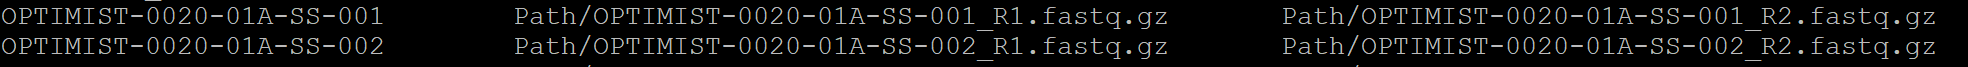
    - paired.ls:
    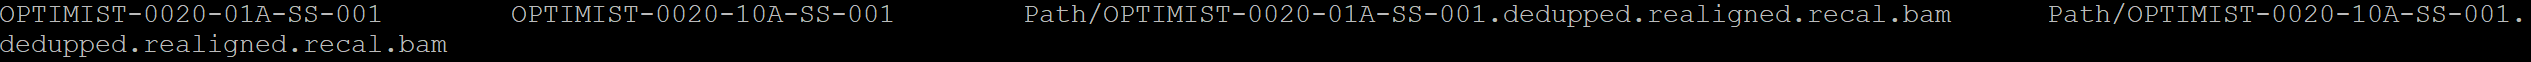
    - tumor_only.ls
    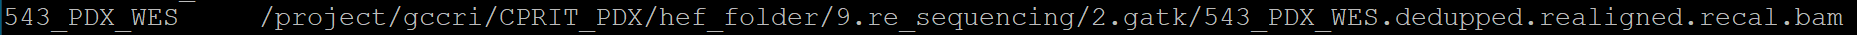
- script: 1.generate_bam.PDX.pl; 2.generate_snv.paired.pl; 2.generate_snv.tumor_only.pl; 3.generate_cnv.paired.pl; 3.generate_cnv.tumor_only.pl;
- generate shell file:

`perl 1.generate_bam.PDX.pl dna_fq.ls
perl 2.generate_snv.tumor_only.pl tumor_only.ls
perl 3.generate_cnv.paired.pl paired.ls`

### <a id="DNAseq_bam"></a>Generate bam

#### Disambiguate (remove PDX  mouse reads)

- input: fastq
- output: fastq after removing mouse reads
- other files: Homo_sapiens_assembly38.fasta; mm10.fa;

mapping to human genome:

`
bwa mem -t 4 -M -R "@RG\tID:1917_PDX_WES\tPL:illumina\tLB:1917_PDX_WES\tPU:1917_PDX_WES\tSM:1917_PDX_WES" /home/hef/Data/hg38/hg38.fa /project/gccri/CPRIT_PDX/fastq/reseq_fq/1917_PDX_D2_S23_R1_001.fastq.gz /project/gccri/CPRIT_PDX/fastq/reseq_fq/1917_PDX_D2_S23_R2_001.fastq.gz|samtools view -Shb -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.human.bam -`<br>
`samtools sort -m 2G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.human.sort.bam -n /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.human.bam`<br>
`/bin/rm -rf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.human.bam
`

mapping to mouse genome:

`
bwa mem -t 4 -M -R "@RG\tID:1917_PDX_WES\tPL:illumina\tLB:1917_PDX_WES\tPU:1917_PDX_WES\tSM:1917_PDX_WES" /home/hef/Data/mm10/mm10.fa /project/gccri/CPRIT_PDX/fastq/reseq_fq/1917_PDX_D2_S23_R1_001.fastq.gz /project/gccri/CPRIT_PDX/fastq/reseq_fq/1917_PDX_D2_S23_R2_001.fastq.gz|samtools view -Shb -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.mouse.bam -`<br>
`samtools sort -m 2G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.mouse.sort.bam -n /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.mouse.bam`<br>
`/bin/rm -rf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.mouse.bam
`

disambiguate:

`
disambiguate -s 1917_PDX_WES -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate -a bwa /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.human.sort.bam /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.mouse.sort.bam
`

convert bam to fastq:

`
samtools sort -m 2G -@ 4 -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam.sortbyname.bam -n /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disambiguatedSpeciesA.bam`<br>
`samtools fastq /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam.sortbyname.bam -1 /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam_1.fastq.gz -2 /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam_2.fastq.gz -0 /dev/null -s /dev/null -n -F 0x900
`

#### <a id="DNAseq_trim"></a>Trim

`trim_galore --phred33 --fastqc --length 50 -q 20 --basename 1917_PDX_WES -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequen
cing/1.trim/trimmed_fq --paired /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam_1.fas
tq.gz /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/0.disambiguate/1917_PDX_WES.disam_2.fastq.gz`<br>
`ln -s /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/trimmed_fq/1917_PDX_WES_val_1.fq.gz /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/Final_fq/1917_PDX_WES.R1.fq.gz`<br>
`ln -s /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/trimmed_fq/1917_PDX_WES_val_2.fq.gz /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/Final_fq/1917_PDX_WES.R2.fq.gz
`

#### <a id="DNAseq_gatk"></a>GATK best practice

- input: fastq
- output: bam
- other files:
    - Homo_sapiens_assembly38.fasta
    - Homo_sapiens_assembly38.dbsnp138.vcf
    - 1000G_phase1.snps.high_confidence.hg38.vcf
    - Mills_and_1000G_gold_standard.indels.hg38.vcf
    - Homo_sapiens_assembly38.known_indels.vcf

Generate bam:

`
bwa mem -t 4 -M -R "@RG\tID:1917_PDX_WES\tPL:illumina\tLB:1917_PDX_WES\tPU:1917_PDX_WES\tSM:1917_PDX_WES" /home/hef/Data/hg
38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/Final_f
q/1917_PDX_WES.R1.fq.gz /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/1.trim/Final_fq/1917_PDX_WES.R2.fq.gz|samtools
view -Shb -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.bam -
`

AddOrReplaceReadGroups:

`
java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/miniconda3/bin/picard.jar
AddOrReplaceReadGroups I=/project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.bam O=/project/gccri/CPRIT
_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.sorted.bam SO=coordinate RGLB=1917_PDX_WES RGPL=illumina RGPU=191
7_PDX_WES RGSM=1917_PDX_WES`<br>
`samtools flagstat /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.sorted.bam > /project/gccri
/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.mapping.txt
`

MarkDuplicates:

`
java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/miniconda3/bin/picard.jar
MarkDuplicates I=/project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.sorted.bam O=/project/gccri/
CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.dedupped.bam VALIDATION_STRINGENCY=SILENT CREATE_INDEX=true M=/project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.dedup.metrics.txt
`

Realigner:

`
java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/gatk-4.2.3.0/GenomeAnalysisTK.jar -T RealignerTargetCreator -nt 4 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -I /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.dedupped.bam -known /home/hef/Data/hg38/resources_broad_hg38_v0/Mills_and_1000G_gold_standard.indels.hg38.vcf -known /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.known_indels.vcf -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.intervals.list`<br>
`java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/gatk-4.2.3.0/GenomeAnalysisTK.jar -T IndelRealigner -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -I /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.added.dedupped.bam -known /home/hef/Data/hg38/resources_broad_hg38_v0/Mills_and_1000G_gold_standard.indels.hg38.vcf -known /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.known_indels.vcf -targetIntervals /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.intervals.list  -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.dedupped.realigned.bam
`

BaseRecalibrator:

`
java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/gatk-4.2.3.0/GenomeAnalysisTK.jar -T BaseRecalibrator -nct 4 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -I /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.dedupped.realigned.bam --knownSites /home/hef/Data/hg38/resources_broad_hg38_v0/1000G_phase1.snps.high_confidence.hg38.vcf --knownSites /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.dbsnp138.vcf --knownSites /home/hef/Data/hg38/resources_broad_hg38_v0/Mills_and_1000G_gold_standard.indels.hg38.vcf --knownSites /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.known_indels.vcf -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.data.table`<br>
`java -Xmx16g -Djava.io.tmpdir=/home/hef/2.project/1.PDX/b.re-sequencing/tmp -jar /home/hef/Tools/gatk-4.2.3.0/GenomeAnalysisTK.jar -T PrintReads -nct 4 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -I /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.dedupped.realigned.bam -BQSR /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.data.table -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/1917_PDX_WES.dedupped.realigned.recal.bam
`

### <a id="DNAseq_snv"></a> Mutation calling

- input: recal.bam
- output: vcf
- otherfiles:
    - gatk4_mutect2_4136_pon.vcf.gz
    - af-only-gnomad.hg38.vcf.gz
    - wgs_calling_regions.hg38.interval_list
    - hg38.centromere_telomere.bed

#### <a id="DNAseq_strelka"></a>Strelka



runManta (for large in-frame indels):

`source /home/hef/Tools/miniconda3/etc/profile.d/conda.sh;conda activate py2`<br>
`configManta.py --normalBam=/project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bam --tumorBam=/project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam --referenceFasta=/home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta  --runDir=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/manta `<br>
`/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/manta/runWorkflow.py -j 4 -g 4 >>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka_run.log 2>&1
`

run Strelka:

`
configureStrelkaSomaticWorkflow.py --normalBam=/project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bam --tumorBam=/project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam --referenceFasta=/home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta --callMemMb=2048  --runDir=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka --indelCandidates=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/manta/results/variants/candidateSmallIndels.vcf.gz >/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka_run.log 2>&1`<br>
`/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/runWorkflow.py -m local -j 4 -g 4 >>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka_run.log 2>&1
`

Generate vcf:

`
less /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/results/variants/somatic.snvs.vcf.gz|bcftools view -i 'FILTER="PASS"'>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/strelka.snvs.vcf`<br>
`less /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/results/variants/somatic.indels.vcf.gz|bcftools view -i 'FILTER="PASS"'>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/strelka.indels.vcf
`

Merge:

`
picard MergeVcfs I=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/results/variants/somatic.snvs.vcf.gz I=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/results/variants/somatic.indels.vcf.gz O=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/somatic.merge.vcf `<br>
`bcftools view -f PASS /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/somatic.merge.vcf >  /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/somatic.merge.filter.vcf`<br>
`vcf-genotype-annotator /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/strelka/somatic.merge.filter.vcf TUMOR 0/1 -o /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.strelka.vcf
`

##### tumor-only

`source /home/hef/Tools/miniconda3/etc/profile.d/conda.sh;conda activate py2`<br>
`configureStrelkaGermlineWorkflow.py --bam /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/543_PDX_WES.dedupped.realigned.recal.bam --referenceFasta /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta --exome --runDir /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/strelka`<br>
`/project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/strelka/runWorkflow.py -m local -j 1 >> /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/strelka_run.log 2>&1` <br>
`bcftools view -f PASS /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/strelka/results/variants/variants.vcf.gz > /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/543_PDX_WES.strelka.vcf
`

#### <a id="DNAseq_varscan"></a>Varscan

- varscan_bam.ls(example): 

` normal_bam  tumor_bam`
    

Run Varscan:

`samtools mpileup -q 1 -Q 13 -f /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -b /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_bam.ls|varscan somatic - /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.out.som --mpileup 1 --output-vcf 1 --output-snp /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_snp --output-indel /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_indel > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan_run.log 2>&1`

Generate somatic mutations:

`
varscan processSomatic /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_indel.vcf`<br>
`varscan processSomatic /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_snp.vcf`<br>
`varscan somaticFilter /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_snp.Somatic.hc.vcf  --indel-file /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_indel.Somatic.hc.vcf --output-file /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.snv.vcf`<br>
`varscan somaticFilter /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan_indel.Somatic.hc.vcf --output-file /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.indel.vcf
`

Merge & filter:

`
bgzip /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.indel.vcf; tabix -p vcf /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.indel.vcf.gz`<br>
`bgzip /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.snv.vcf; tabix -p vcf /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.snv.vcf.gz`<br>
`bcftools concat -a /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.indel.vcf.gz /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.snv.vcf.gz > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.merge.vcf`<br>
`perl /home/hef/Tools/fpfilter.pl --vcf-file  /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/varscan.filtered.merge.vcf --bam-file /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam  --sample TUMOR --reference /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta --output /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/OPTIMIST-0020-01A-SS-001.varscan.result.vcf`<br>
`bcftools view -f PASS /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/varscan/OPTIMIST-0020-01A-SS-001.varscan.result.vcf > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.varscan.vcf
`

##### tumor-only

`samtools mpileup -B -f /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/543_PDX_WES.dedupped.realigned.recal.bam > /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.pileup`<br>
`varscan mpileup2snp /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.pileup --output-vcf 1 --vcf-sample-list /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/sample.list> /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.vcf`<br>
`varscan mpileup2indel /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.pileup --output-vcf 1 --vcf-sample-list /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/sample.list > /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.vcf`<br>
`varscan filter /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.vcf --output-file /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.fil.vcf;varscan filter /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.vcf --indel-file /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.fil.vcf --output-file /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.fil.vcf`<br>
`bgzip /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.fil.vcf; bgzip /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.vcf`<br>
`tabix -p vcf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.vcf.gz; tabix -p vcf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.fil.vcf.gz`<br>
`bcftools concat -a /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.snp.vcf.gz /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.indel.fil.vcf.gz  > /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.filtered.merge.vcf`<br>
`perl /home/hef/Tools/fpfilter.pl --vcf-file  /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.filtered.merge.vcf --bam-file /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/543_PDX_WES.dedupped.realigned.recal.bam  --sample TUMOR --reference /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta --output /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.varscan.result.vcf`<br>
`bcftools view -f PASS /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/varscan/543_PDX_WES.varscan.result.vcf > /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/543_PDX_WES.varscan.vcf
`

#### <a id="DNAseq_mutect"></a>Mutect

Run Mutect:

`gatk Mutect2 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -L /home/hef/Data/files_liding/mutect/wgs_calling_regions.hg38.interval_list -I /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam -tumor OPTIMIST-0020-01A-SS-001 -I /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bam -normal OPTIMIST-0020-10A-SS-001 --germline-resource /home/hef/Data/files_liding/mutect/af-only-gnomad.hg38.vcf.gz --panel-of-normals /home/hef/Data/files_liding/mutect/gatk4_mutect2_4136_pon.vcf.gz -O /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.vcf > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect_run.log 2>&1
`

Filter:

`
gatk FilterMutectCalls -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -V /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.vcf -O /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.filter.vcf`<br>
`gatk SelectVariants -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -V /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.filter.vcf -O /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.snp.vcf --select-type-to-include SNP --select-type-to-include MNP;gatk SelectVariants -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -V /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.filter.vcf -O /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.indel.vcf --select-type-to-include INDEL`<br>
`less /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.snp.vcf|bcftools view -i 'FILTER="PASS"'>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.fil.snp.vcf`<br>
`less /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.raw.indel.vcf|bcftools view -i 'FILTER="PASS"'>/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.fil.indel.vcf
`

Merge:

`
picard MergeVcfs I=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.fil.snp.vcf I=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/mutect/mutect.fil.indel.vcf O=/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.mutect.vcf
`

##### tumor-only

`sh /home/hef/Tools/somaticwrapper-master/somatic.Mutect2_tumorOnly/somaticMut.tumor-only.mutect2.sh -c /home/hef/2.project/1.PDX/4.DNAseq_mutation/1.somatic/2.without_G/config.mutect2.tumor_only.ini -p s0 -n 543_PDX_WES -b /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/543_PDX_WES.dedupped.realigned.recal.bam -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/mutect`<br>
`cp /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/mutect/543_PDX_WES/filtered.rem_dbSNP_noCOSMIC.vcf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/3.snv/tumor_only/543_PDX_WES/543_PDX_WES.mutect.vcf
`

#### <a id="DNAseq_pindel"></a> Pindel

- pindel.config (example): bam - insert size - id
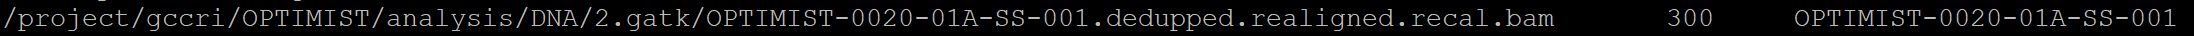

- pindel.filter.config (example):

>pindel.filter.variants_file = /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/all.header<br>
pindel.filter.pindel2vcf = /home/hef/Tools/miniconda3/bin/pindel2vcf<br>
pindel.filter.REF = /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta<br>
pindel.filter.heterozyg_min_var_allele_freq = 0.2<br>
pindel.filter.homozyg_min_var_allele_freq = 0.8<br>
pindel.filter.mode = somatic<br>
pindel.filter.apply_filter = true<br>
pindel.filter.somatic.min_coverages_t = 10<br>
pindel.filter.somatic.min_coverages_n = 3<br>
pindel.filter.somatic.min_var_allele_freq = 0.10<br>
pindel.filter.somatic.require_balanced_reads = true<br>
pindel.filter.somatic.remove_complex_indels = true<br>
pindel.filter.somatic.max_num_homopolymer_repeat_units = 6<br>
pindel.filter.date=20221225

Run Pindel:

`pindel -T 8 -f /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -i /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/pindel.config --exclude /home/hef/Data/hg38/hg38.centromere_telomere.bed -o /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/pindel_raw >/project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel_run.log 2>&1`<br>
`cat /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/pindel*_D /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/pindel*_SI |grep ChrID > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/all.header
`

Filter:

`
perl /home/hef/Tools/somaticwrapper-master/pindel_filter.v0.5.pl /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/pindel.filter.config`<br>
`vt normalize /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/all.header.CvgVafStrand_pass.Homopolymer_pass.vcf -r /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -o /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.vcf -n`<br>
`perl /home/hef/2.project/1.PDX/4.DNAseq_mutation/1.somatic/1.paired/add_pindel_flag.pl /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.vcf > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.flag.vcf`<br>
`vt normalize /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/all.header.CvgVafStrand_pass.Homopolymer_pass.vcf -r /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -o /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.vcf -n`<br>
`perl /home/hef/2.project/1.PDX/4.DNAseq_mutation/1.somatic/1.paired/add_pindel_flag.pl /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.vcf > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.flag.vcf
`

Generate vcf:

`bcftools view -f PASS /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/pindel/OPTIMIST-0020-01A-SS-001.indel.filter.output.norm.flag.vcf > /project/gccri/OPTIMIST/analysis/DNA/3.snv/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.pindel.vcf
`

### <a id="DNAseq_cnv"></a> Copy number variations

- input: bam
- output: seg file

#### <a id="DNAseq_cnvkit"></a> cnvkit

Link bam/bai files:

`ln -s /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.T.bam;
ln -s /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bai /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.T.bam.bai;
ln -s /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bam /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.N.bam;
ln -s /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bai /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.N.bam.bai
`

Run cnvkit (parameter: *-1.1,-0.25,0.2,0.7* or *-1.1,-0.4,0.3,0.7*):
 
`bash /home/hef/Tools/cnvkit_liding/src/cnvkit_wxs.tumorNormal.v2.sh -C /home/hef/Tools/cnvkit_liding/config/config.gencode_grch38.mgi.ini -p -1.1,-0.25,0.2,0.7 -S OPTIMIST-0020-01A-SS-001 -N /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.N.bam -T /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.T.bam -O /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit|sh`


##### tumor-only

Generate reference cnn based on unmatched normal samples:
- for each normal files:

`/home/hef/Tools/miniconda3/bin/cnvkit.py coverage 1753_Germline_WGS.dedupped.realigned.recal.bam /home/hef/Tools/cnvkit_liding/hg38_bed/hg38_target -o /cnvkit/tumor_only/ref/1753_Germline_WGS.targetcoverage.cnn;
/home/hef/Tools/miniconda3/bin/cnvkit.py coverage 1753_Germline_WGS.dedupped.realigned.recal.bam /home/hef/Tools/cnvkit_liding/hg38_bed/hg38_antitarget -o /cnvkit/tumor_only/ref/1753_Germline_WGS.antitargetcoverage.cnn`
- generate reference.cnn:

`cnvkit.py reference *Normal.{,anti}targetcoverage.cnn --fasta hg38.fa -o Reference.WES.cnn/Reference.WGS.cnn`


Run cnvkit:

`bash /home/hef/Tools/cnvkit_liding/src/cnvkit_wxs.tumorOnly.v2.sh -N 543_PDX_WES -C /home/hef/Tools/cnvkit_liding/config/config.gencode_grch38.mgi.ini -p -1.1,-0.25,0.2,0.7 -B /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/cnvkit/543_PDX_WES/543_PDX_WES.T.bam -R /project/gccri/CPRIT_PDX/hef_folder/5.CNV/cnvkit/tumor_only/ref/Reference.WES.cnn -O /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/cnvkit/543_PDX_WES
`
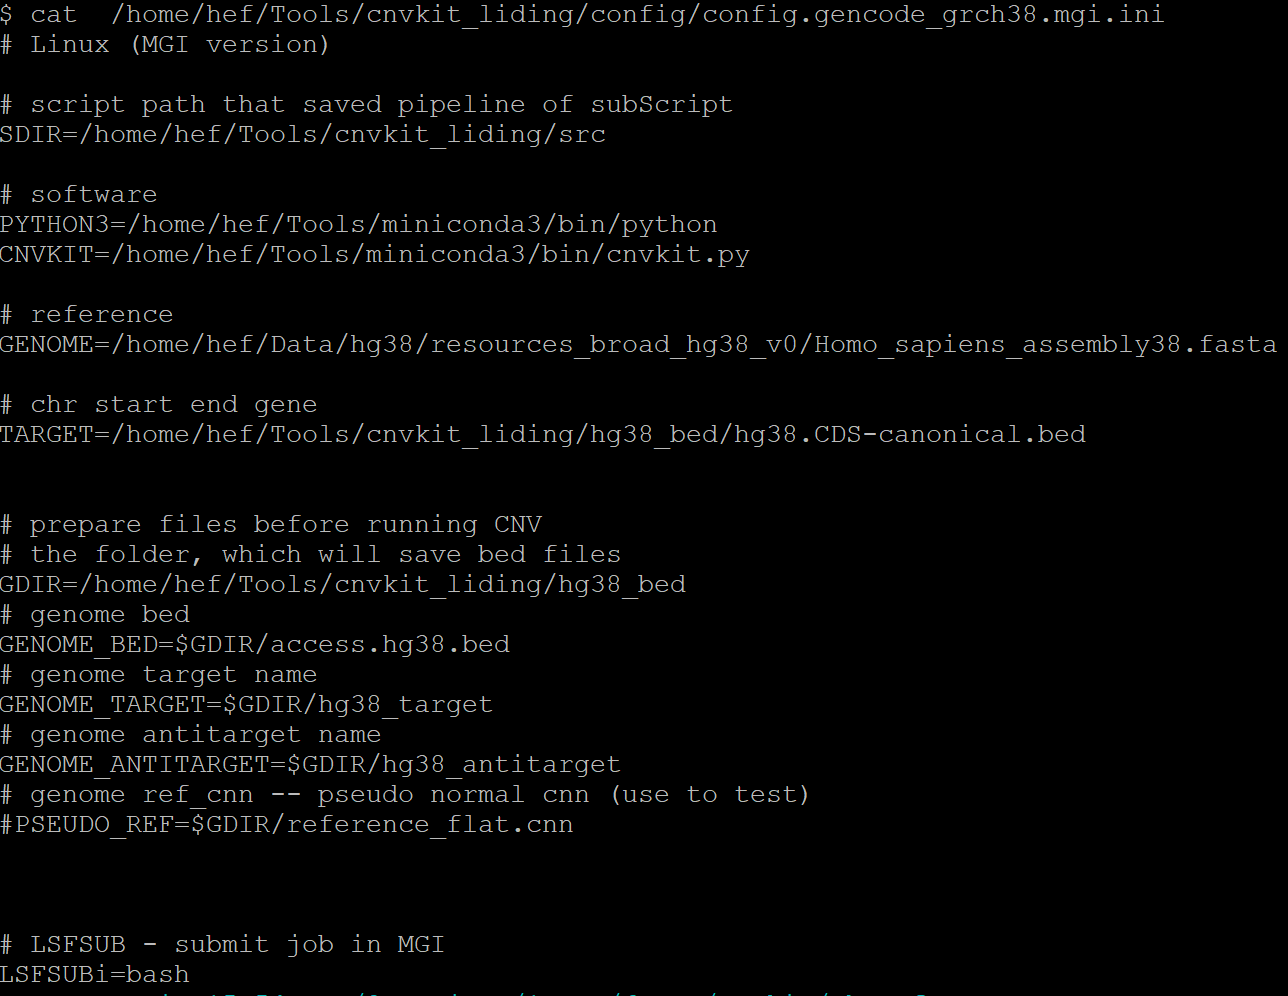

#### <a id="DNAseq_seqz"></a>sequenza (for WES only)

Rscript (example):

>library(sequenza)  <br>
data.file <- "/project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.seqz.gz"  <br>
seqz <-sequenza.extract(data.file,verbose=FALSE)  <br>
CP <- sequenza.fit(seqz) <br>
sequenza.results(sequenza.extract = seqz, cp.table = CP, sample.id = "OPTIMIST-0020-01A-SS-002",  out.dir="/project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002")



Generate seqz file:

`
/home/hef/Tools/miniconda3/bin/sequenza-utils bam2seqz -n /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-002.dedupped.realigned.recal.bam -t /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-002.dedupped.realigned.recal.bam --fasta /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -gc /home/hef/Data/hg38/resources_broad_hg38_v0/hg38.gc50Base.wig.gz -o /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.seqz.gz`<br>
`less /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.seqz.gz|grep -v "_random" |bgzip > /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/new.gz; mv /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/new.gz /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.seqz.gz; tabix -f -s 1 -b 2 -e 2 -S 1 /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.seqz.gz
`

Run sequenza:

`
Rscript /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002.r > /project/gccri/OPTIMIST/analysis/DNA/4.cnv/seqz/OPTIMIST-0020-01A-SS-002.log 2>&1
`


#### <a id="DNAseq_purecn"></a>pureCN 

Generate hg38_simpleRepeats.bed file:
    
>downloadFromUCSC <- TRUE <br>
if (downloadFromUCSC) {<br>
  library(rtracklayer)<br>
  mySession <- browserSession("UCSC")<br>
  genome(mySession) <- "hg38"<br>
  simpleRepeats <- track(ucscTableQuery(mySession,
                                        track="Simple Repeats", 
                                        table="simpleRepeat"))<br>
  export(simpleRepeats, "hg38_simpleRepeats.bed")<br>
}<br>
snp.blacklist <- import("hg38_simpleRepeats.bed", format = "bed")   `

Code to generate mapping bias rds:

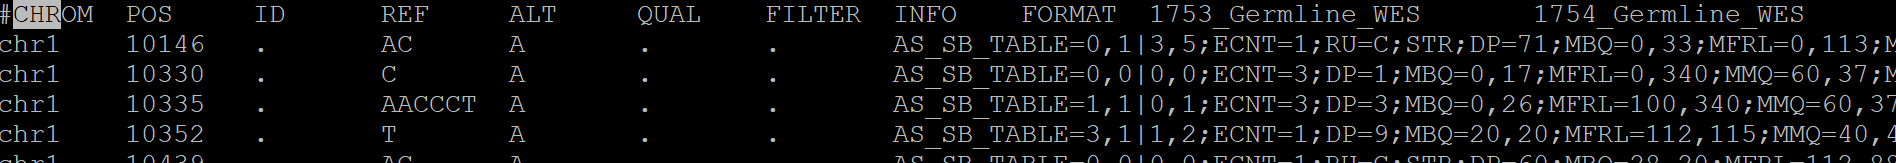
>library(PureCN) <br>
normal.panel.vcf.file <- "/project/gccri/CPRIT_PDX/hef_folder/3.DNA_mutation/1.somatic/2.without_Germline/sm_withoutG/PON/pon_WES.merge.vcf.gz" <br>
bias <- calculateMappingBiasVcf(normal.panel.vcf.file, genome = "hg38") <br>
saveRDS(bias, "/project/gccri/CPRIT_PDX/hef_folder/5.CNV/pureCN/WES_mapping_bias.rds")


Convert cnvkit_cnr to seg: 

`cnvkit.py export seg /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.T.cns --enumerate-chroms -o /project/gccri/OPTIMIST/analysis/DNA/4.cnv/pureCN/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.seg
`

Run Mutect2 to call germline mutations:

`
gatk Mutect2 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -L /home/hef/Data/files_liding/mutect/wgs_calling_regions.hg38.interval_list -I /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-01A-SS-001.dedupped.realigned.recal.bam -tumor OPTIMIST-0020-01A-SS-001 -I /project/gccri/OPTIMIST/analysis/DNA/2.gatk/OPTIMIST-0020-10A-SS-001.dedupped.realigned.recal.bam -normal OPTIMIST-0020-10A-SS-001 --germline-resource /home/hef/Data/files_liding/mutect/af-only-gnomad.hg38.vcf.gz --panel-of-normals /home/hef/Data/files_liding/mutect/gatk4_mutect2_4136_pon.vcf.gz -XL /home/hef/Data/hg38/hg38.centromere_telomere.bed -O /project/gccri/OPTIMIST/analysis/DNA/4.cnv/pureCN/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.raw.vcf --genotype-germline-sites true --genotype-pon-sites true
`

Run pureCN:

`
Rscript /home/hef/Tools/miniconda3/lib/R/library/PureCN/extdata/PureCN.R --out /project/gccri/OPTIMIST/analysis/DNA/4.cnv/pureCN/OPTIMIST-0020-01A-SS-001 --sampleid OPTIMIST-0020-01A-SS-001 --tumor /project/gccri/OPTIMIST/analysis/DNA/4.cnv/cnvkit/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.T.cnr --seg-file /project/gccri/OPTIMIST/analysis/DNA/4.cnv/pureCN/OPTIMIST-0020-01A-SS-001/OPTIMIST-0020-01A-SS-001.seg --mapping-bias-file /project/gccri/CPRIT_PDX/hef_folder/5.CNV/pureCN/WES_mapping_bias.rds --vcf /project/gccri/OPTIMIST/analysis/DNA/4.cnv/pureCN/OPTIMIST-0020-01A-SS-002/OPTIMIST-0020-01A-SS-002.raw.vcf --snp-blacklist /project/gccri/CPRIT_PDX/hef_folder/5.CNV/pureCN/hg38_simpleRepeats.bed --genome hg38 --fun-segmentation none --force --post-optimize --seed 123 --sex ?
`

##### tumor-only

`cnvkit.py export seg /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/cnvkit/543_PDX_WES/543_PDX_WES.T.cns --enumerate-chroms -o /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/pureCN/543_PDX_WES/543_PDX_WES.seg`<br>
`gatk Mutect2 -R /home/hef/Data/hg38/resources_broad_hg38_v0/Homo_sapiens_assembly38.fasta -L /home/hef/Data/files_liding/mutect/wgs_calling_regions.hg38.interval_list -I /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/2.gatk/543_PDX_WES.dedupped.realigned.recal.bam -tumor 543_PDX_WES --germline-resource /home/hef/Data/files_liding/mutect/af-only-gnomad.hg38.vcf.gz --panel-of-normals /project/gccri/CPRIT_PDX/hef_folder/3.DNA_mutation/1.somatic/2.without_Germline/sm_withoutG/PON/pon.WES.vcf.gz -XL /home/hef/Data/hg38/hg38.centromere_telomere.bed -O /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/pureCN/543_PDX_WES/543_PDX_WES.raw.vcf --genotype-germline-sites true --genotype-pon-sites true`<br>
`Rscript /home/hef/Tools/miniconda3/lib/R/library/PureCN/extdata/PureCN.R --out /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/pureCN/543_PDX_WES --sampleid 543_PDX_WES --tumor /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/cnvkit/543_PDX_WGS/543_PDX_WGS.T.cnr --seg-file /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/pureCN/543_PDX_WGS/543_PDX_WGS.seg --mapping-bias-file /project/gccri/CPRIT_PDX/hef_folder/5.CNV/pureCN/WES_mapping_bias.rds --vcf /project/gccri/CPRIT_PDX/hef_folder/9.re_sequencing/4.cnv/pureCN/543_PDX_WES/543_PDX_WES.raw.vcf --snp-blacklist /project/gccri/CPRIT_PDX/hef_folder/5.CNV/pureCN/hg38_simpleRepeats.bed --genome hg38 --fun-segmentation none --force --post-optimize --seed 123 --sex F
`